# GEAM - Image Snippets

### Conversor BGR para RGB

In [12]:
import cv2

def BGR_2_RGB(image):
    (B, G, R) = cv2.split(image)
    image_rgb = cv2.merge([R, G, B])
    return image_rgb

### Plotagem duas imagens lado a lado

In [15]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def duas_imagens_lado_a_lado(diret_img_esq, diret_img_dir):
    img_esq = cv2.imread(diret_img_esq)
    img_dir = cv2.imread(diret_img_dir)

    f, axarr = plt.subplots(1,2)
    #axarr[0].imshow(BGR_2_RGB(img_esq))
    #axarr[1].imshow(BGR_2_RGB(img_dir))
    axarr[0].imshow(img_esq)
    axarr[1].imshow(img_dir)


### Eliminação de contornos brancos numa imagem binária

In [26]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def elimina_espacos_em_branco(diretorio_imagem, salva=True, sufixo='_crop.png'):
    imagem = img_as_float(io.imread(diretorio_imagem))
    branco = np.array([1, 1, 1])
    mascara = np.abs(imagem - branco).sum(axis=2) < 0.05

    coords = np.array(np.nonzero(~mascara))

    top_left = np.min(coords, axis=1)
    bottom_right = np.max(coords, axis=1)

    imagem_gerada = imagem[top_left[0]:bottom_right[0],top_left[1]:bottom_right[1]]
    
    if(salva):
        diretorio_imagem_gerada = diretorio_imagem+sufixo
        plt.imsave(diretorio_imagem_gerada, imagem_gerada)

### Combinacao de imagens

In [58]:
import sys
from PIL import Image

def combinacao_imagens(array_diretorios_imagens):
    imagens = map(Image.open, array_diretorios_imagens)
    laguras, alturas = zip(*(i.size for i in imagens))

    largura_total = sum(laguras)
    altura_maxima = max(alturas)

    imagem_gerada = Image.new('RGB', (largura_total, altura_maxima))

    x_offset = 0
    for imagem in imagens:
      imagem_gerada.paste(imagem, (x_offset,0))
      x_offset += imagem.size[0]

    plt.imshow(imagem_gerada)

In [69]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def binarizacao_imagem(diretorio_imagem):
    img_color = cv.imread(diretorio_imagem)
    img = cv.imread(diretorio_imagem,0)
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    titles = ['Imagem original','Imagem apos binarizacao']
    images = [BGR_2_RGB(img_color), thresh1]

    plt.subplots(1,2,figsize=(30,15))
    for i in range(len(images)):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.xticks([]),plt.yticks([])
        plt.title(titles[i])
    plt.show()
    #plt.savefig('rgb_to_bin_exemplo.png')

## Exemplos

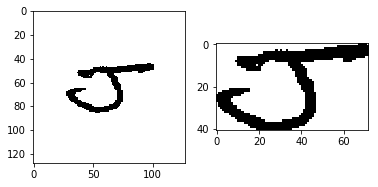

In [70]:
diretorio_imagem = 'images/train_4a_00000.png'
elimina_espacos_em_branco(diretorio_imagem)
duas_imagens_lado_a_lado(diretorio_imagem, diretorio_imagem_gerada)

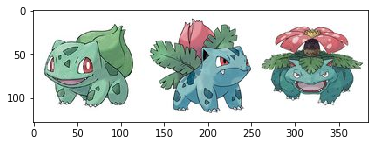

In [71]:
array_diretorios_imagens = ['images/bulbasaur.jpg', 'images/ivysaur.jpg', 'images/venusaur.jpg']
combinacao_imagens(array_diretorios_imagens)

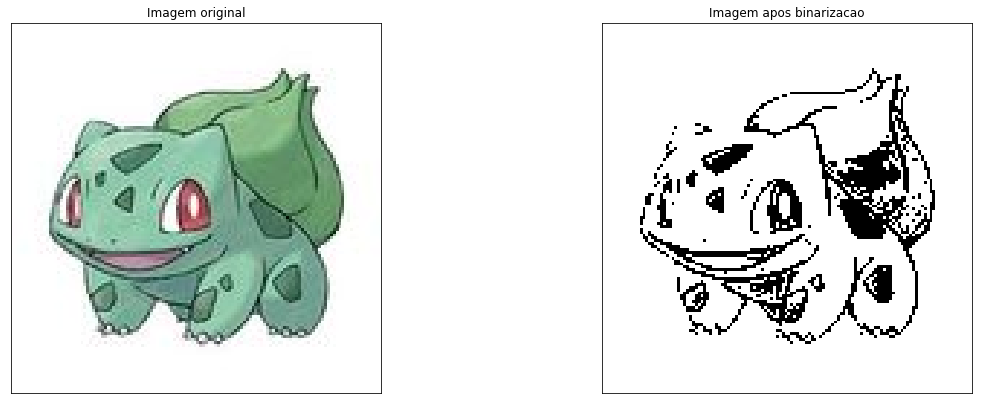

In [72]:
binarizacao_imagem('images/bulbasaur.jpg')